In [1]:
import numpy as np
np.random.seed(1337)  # seed
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape, X_test.shape)
# 標準化 + 6000 * 28 * 28 攤開成 6000 * 784
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [5]:
#將train順序random
import numpy as np
shuffle_index = np.random.permutation(60000)
print(shuffle_index.shape)
X_train[shuffle_index], y_train[shuffle_index]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
# print(X_train[0], X_train[shuffle_index])

(60000,)


In [6]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
print(sum(y_train_5), sum(y_test_5))

5421 892


In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [23]:
some_digit

NameError: name 'some_digit' is not defined

In [30]:
for i in range(0,50):
    print(sgd_clf.predict(X_test[i]), y_test[i])

[False] 7
[False] 2
[False] 1
[False] 0
[False] 4
[False] 1
[False] 4
[False] 9
[False] 5
[False] 9
[False] 0
[False] 6
[False] 9
[False] 0
[False] 1
[ True] 5
[False] 9
[False] 7
[False] 3
[False] 4
[False] 9
[False] 6
[False] 6
[ True] 5
[False] 4
[False] 0
[False] 7
[False] 4
[False] 0
[False] 1
[False] 3
[False] 1
[False] 3
[False] 4
[False] 7
[False] 2
[False] 7
[False] 1
[False] 2
[False] 1
[False] 1
[False] 7
[False] 4
[False] 2
[False] 3
[ True] 5
[False] 1
[False] 2
[False] 4
[False] 4


C:\Users\burt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\burt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\burt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

In [8]:
# 分群算各自正確率
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495

0.9689
0.9636
0.9624


In [9]:
print(y_train_5)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(train_index, test_index)

[False False False ..., False False False]
[19926 19927 19928 ..., 59997 59998 59999] [    0     1     2 ..., 20834 20838 20840]
[    0     1     2 ..., 59997 59998 59999] [19926 19927 19928 ..., 40003 40004 40005]
[    0     1     2 ..., 40003 40004 40005] [39947 39985 39988 ..., 59997 59998 59999]


In [10]:
# 分群算各自正確率(用cross_val_score)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([ 0.9689,  0.9636,  0.9624])

In [37]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(len(y_pred), y_pred[:20])
print(len(y_train_pred), y_train_pred[:20]) 
print(len(y_train_5), y_train_5[:20])

20000 [False  True False  True  True  True  True False False False False False
 False False False False False  True  True False]
60000 [False False False  True False False False False False False False False
 False False False False False False False False]
60000 [False False False  True False False False False False False False False
 False False False False  True False False False]


In [12]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53803,   776],
       [ 1326,  4095]])

In [18]:
# precision & recall
from sklearn.metrics import precision_score, recall_score
# TP:true positives(猜5實際為5)  FP:false positives(猜5實際不為5)  FN:false negatives(猜不是5實際為5)
print(precision_score(y_train_5, y_train_pred))     # == TP / (TP + FP)
print(recall_score(y_train_5, y_train_pred))  # == TP / (TP + FN)


0.840689796756
0.755395683453


In [24]:
# F1
from sklearn.metrics import f1_score
print(len(y_train_5), len(y_train_pred))
print(2 / (1 / 0.84069 + 1 / 0.755397)) # F1 = 2 / (1 / precision + 1 / recall)
f1_score(y_train_5, y_train_pred)


60000 60000
0.7957645215204434


0.79576369996113483

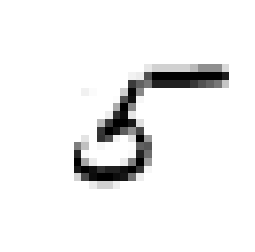

In [43]:
some_digit = X_train[36005]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()


In [44]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ 8.33452415]
[ True]


In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
print(y_scores)

[-11.64000236 -11.63238413 -10.45420378 ...,  -5.15841879  -6.00373431
  -7.62083796]


In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

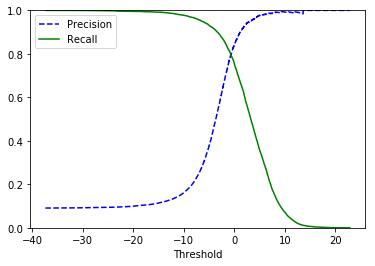

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)